<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Fitbit_Main_codebase_Dailyactivity_Pot_Initial_02_07_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from tqdm.notebook import tqdm
from glob import glob
import os
import pandas as pd
import ipywidgets as widgets



def get_content(patient_folder_adrs):

  for i in glob(patient_folder_adrs+"/*"):
    content = i.split("_")
    if "heartrate" in content and "seconds" in content:
      post_sec = i
    if "minuteMETsNarrow" in content:
      post_met = i

  return post_sec,post_met



def items_check_box(items):
  new_keys=[]
  for i in items:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys
result={}


def week_count(df,time_col):
    df[time_col] = pd.to_datetime(df[time_col])
    df['Date'] = df[time_col].dt.date
    df[time_col] = df[time_col].dt.strftime('%m/%d/%Y %I:%M:%S %p')
    df[time_col] = pd.to_datetime(df[time_col]).dt.time
    df['Time_Only'] = df[time_col].apply(lambda x: x.strftime('%H:%M:%S'))
    min_date = df['Date'].min()
    df['Week_Number'] = (df['Date'] - min_date).dt.days // 7 + 1
    df['Date'] = df['Date'].astype(str)

    return df



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Convert Time_Only column to datetime


def plot_avg_line(df,interval=4):
  df['Time_Only'] = pd.to_datetime(df['Time_Only'])

  # Plot
  sns.set_style("whitegrid")
  plt.figure(figsize=(12, 6))
  sns.lineplot(data=df, x='Time_Only', y=df.columns[1], ci='sd')  # 'sd' for standard deviation as error bars

  plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=interval))
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

  plt.title('Line Chart of '+df.columns[1]+' over Time with Error Bars')
  plt.xlabel('Time')
  plt.ylabel(df.columns[1])
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()



In [3]:
path = "/content/drive/MyDrive/Iqram Sir/Fitbit_temp/data"



#path = "/home/iqh4001/Iqram_WCM/MADE Lab/Wearable Project/Data/Fitbit Database/ Dr. Kaur's Lab/Aim 3 Fitbit Data"

In [4]:
sub_list=[]

for i in sorted(glob(path+"/*")):
  sub_list.append(os.path.basename(i))

new_keys=items_check_box(sub_list)

Checkbox(value=False, description='Sub_1', indent=False)

Checkbox(value=False, description='Sub_2', indent=False)

Checkbox(value=False, description='Sub_3', indent=False)

In [5]:
subject_list = []
for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    subject_list.append(sub_list[i])

subject_list

['Sub_1']

In [6]:





for i in tqdm(subject_list):
    datapath= path+'/'+i
    Post_sec,Post_met = get_content(datapath)
    df_post_sec_ini = week_count(pd.read_csv(Post_sec),'Time')
    df_post_met_ini = week_count(pd.read_csv(Post_met),'ActivityMinute')
    #df_post_sec_ini['Date'] = df_post_sec_ini['Date'].astype(str)
    #df_post_met_ini['Date'] = df_post_met_ini['Date'].astype(str)


  0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
date_list = list(set(df_post_sec_ini['Date']))
df = df_post_sec_ini.query("Date == '"+date_list[0]+"'")

In [12]:

week = 1
week_df_heart = df_post_sec_ini.query("Week_Number == "+str(week))
week_df_met = df_post_met_ini.query("Week_Number == "+str(week))

In [19]:
week_df_heart.columns[1]


'Value'

<ipython-input-22-d29af1923c06>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_Only'] = pd.to_datetime(df['Time_Only'])
<ipython-input-22-d29af1923c06>:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x='Time_Only', y=df.columns[1], ci='sd')  # 'sd' for standard deviation as error bars


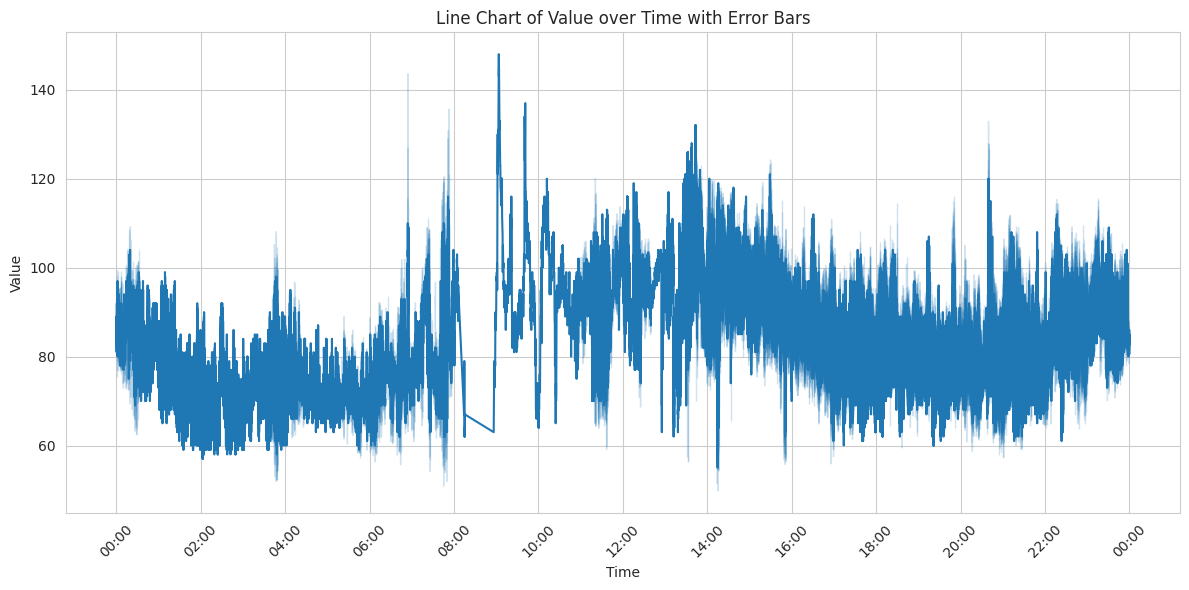

In [26]:
plot_avg_line(week_df_heart,2)